<img src='https://github.com/wekeo/ai4EM_MOOC/raw/04147f290cfdcce341f819eab7ad037b95f25600/img/ai4eo_logos.jpg' alt='Logo EU Copernicus WEkEO' align='center' width='100%'></img>


# LAND SERVICE MONITORING WORKSHOP IN ICELAND

<div style="text-align: right"><i> BEGINNER TO INTERMEDIATE LEVEL </i></div>

***
<center><h1> Urban Atlas Dataset: Examining city design of Reykjavík </h1></center>

***
This notebook has been adapted from the original materials provided in the [WEkEO Synergy Training](https://github.com/wekeo/wekeo4synergy/tree/main/training_land_use_monitoring/urban/) for use in the Land Service Monitoring workshop in Iceland.

How to work with this notebook

- Execute each cell through the <button class="btn btn-default btn-xs"><img src="imgs/play.png" alt="Play Button" style="height:14px;"></button> "RUN" button from the top "MENU" (or keyboard shortcut Shift + Enter).<br>
<br>
- If, for any reason, the kernel is not working anymore, in the top MENU, click on the <button class="btn btn-default btn-xs"><i class="fa fa-repeat icon-repeat"></i></button> button. Then, in the top MENU, click on "Run" and select "Run All Above Selected Cell".<br>
<br>
- You can run this notebook in any environment (locally or on platforms like [WEkEO](https://www.wekeo.eu/)) as long as the required packages are installed.  

If you experience any issues with WEkEO login or data access, please contact WEkEO support:

- Visit the [Help Center](https://help.wekeo.eu/en/)
- Use the [live chat widget](https://www.wekeo.eu/support)
- Email [support@wekeo.eu](mailto:support@wekeo.eu) <br>
<br>
***

This version has been customized for hands-on exercises focusing on land use monitoring and environmental change within the Icelandic context.

# Table of contents
- [1. Introduction](#1.-Introduction)
- [2. Setting up the Python environment](#2.-Setting-up-the-Python-environment)
    - [2.1 Required Python modules](#2.1-Required-Python-modules)
    - [2.2 Install required Python modules](#2.2-Install-required-Python-modules)
    - [2.3 Import required Python modules](#2.3-Import-required-Python-modules)
- [3. Data Access](#3.-Data-Access)
    - [3.1. Presentation of the product used](#3.1.-Presentation-of-the-product-used)
    - [3.2. Retrieving the data](#3.2.-Retrieving-the-data)
- [4. Exploring the dataset](#4.-Exploring-the-dataset)
    - [4.1. Basic Manipulations](#4.1.-Basic-Manipulations)
    - [4.2. Intermediate Manipulations](#4.2.-Intermediate-Manipulations)
         - [4.2.1. Geospatial subsetting](#4.2.1.-Geospatial-subsetting)
         - [4.2.2. Drawing Chloropleth maps](#4.2.2.-Drawing-Chloropleth-maps)
- [5. Analysing the land use of Reykjavik and its neighborhood](#5.-Analysing-the-land-use-of-Reykjavik-and-its-neighborhood)
- [6. Case study : Proximity of the urban areas to green spaces](#6.-Case-study-:-Proximity-of-the-urban-areas-to-green-spaces)
- [7. Conclusion](#7.-Conclusion)
- [8. Exercises](#8.-Exercises)

# 1. Introduction

[Go back to the "Table of contents"](#Table-of-contents)

The Copernicus Land Monitoring Service (CLMS) provides geospatial data that supports a wide range of applications, including urban studies and planning. One of the key products within CLMS is the Urban Atlas, which offers high-resolution land use and land cover data for European cities and their surrounding areas. This dataset is specifically designed to help urban planners, policymakers, and researchers understand and manage urban growth, spatial patterns, and the environmental impacts of urbanization.

The Urban Atlas provides detailed land use classifications and tracks changes in urban sprawl, green spaces, infrastructure development, and other key aspects of urban environments. By using this data, decision-makers can assess urban expansion, optimize land use, and support evidence-based planning efforts to promote sustainable development in cities.

In this exercise, we will demonstrate how to access the Urban Atlas data through the WEkEO platform. This notebook will guide you through retrieving, visualizing, and analyzing land use information for urban areas. While the focus is on the Urban Atlas product, the methods used here can easily be adapted to other CLMS datasets, such as Corine Land Cover, allowing for broader land monitoring applications.

By following this notebook, you'll learn how to effectively use the Urban Atlas data to assess urbanization patterns and their environmental impacts, supporting more informed urban planning and development strategies.



| <img src="imgs/Reykjavik.png" width="600"> | 
|:--:| 
|  View from Hallgrímskirkja. From [Wikipedia](https://commons.wikimedia.org/wiki/File:View_from_Hallgr%C3%ADmskirkja_2.JPG) |




In this training, you will learn to retrieve, open and visualize data from the WEkEO data portal, in order to study the urban design of Reykjavik.

# 2. Setting up the Python environment
[Go back to the "Table of contents"](#Table-of-contents)




## 2.1 Required Python modules
[Go back to the "Table of contents"](#Table-of-contents)

The Jupyter Notebook needs to be configured with all the required tools from the Python ecosystem. If you are using a specific environment, like WEkEO, make sure to select the "miniwekeolab" kernel, which comes with the necessary libraries pre-installed. If not, be sure to that you have installed the following modules. Here's a list of the modules we will use in this exercise.

| Module name | Description |
| :---: | :---|
| **hda**         | The [hda](https://pypi.org/project/hda/) module is used to access Earth observation data from WEkEO Data Access. |
| **numpy**       | [NumPy](https://numpy.org/) is the fundamental package for scientific computing and ND-arrays. |
| **scipy**       | [SciPy](https://scipy.org/) is a library for scientific and technical computing, built on NumPy. |
| **xarray**      | [Xarray](https://xarray.pydata.org/) is used for working with labeled multi-dimensional arrays. |
| **matplotlib**  | [Matplotlib](https://matplotlib.org/) is a 2D plotting library that produces high-quality figures. |
| **cartopy**     | [Cartopy](https://scitools.org.uk/cartopy/docs/latest/) is a library for plotting maps and geospatial data analyses in Python. |
| **pandas**      | [Pandas](https://pandas.pydata.org/) is a powerful data analysis and manipulation library. |
| **geopandas**   | [Geopandas](https://geopandas.org/) enables spatial operations on geometric data. |
| **shapely**     | [Shapely](https://shapely.readthedocs.io/) is used to create and analyze geometric objects. |
| **fiona**       | [Fiona](https://fiona.readthedocs.io/) is used for reading and writing vector data. |
| **rasterio**    | [Rasterio](https://rasterio.readthedocs.io/) is used for reading and writing geospatial raster data. |



## 2.2 Install required Python modules
[Go back to the "Table of contents"](#Table-of-contents)

Before you run the main parts of the code, you need to make sure that all the required Python packages are installed. The code below installs the necessary packages.

What to Do:

1. **If all requirements are already fulfilled**:
   - You will see messages indicating that the packages are already installed and up to date.
   - In this case, you can proceed to the next section of the notebook without any further action.
   
2. **If any package needs installation**:
   - The package manager will automatically install the missing packages.
   - Once the installation is complete, you may see a message confirming the successful installation of each package.
   - After installation, you can proceed to the next section of the notebook.

📌 Important Notes:
- **Run this cell only once**: These installations only need to be done the first time you set up the environment. After that, the packages will remain installed unless the environment is reset.
- If you encounter any errors during installation, check the error message for specific details, or try running the installation command again.




In [ ]:
# install the necessary packages
%pip install numpy 
%pip install scipy
%pip install xarray  
%pip install matplotlib 
%pip install cartopy  
%pip install pandas  
%pip install geopandas  
%pip install shapely  
%pip install fiona  
%pip install rasterio


# install hda - WEKEO API client
%pip install hda -U 

## 2.3 Import required Python modules
[Go back to the "Table of contents"](#Table-of-contents)

This is an important cell as it imports all the necessary Python modules for the notebook to run properly. If your kernel dies or you need to restart the session, **you must run this cell again** to re-import the required libraries before proceeding with any other code.

📌 **Make sure to always run this cell before continuing with the rest of the notebook.**


In [6]:
# Modules system
import warnings
warnings.filterwarnings('ignore')
import getpass
import os
from pathlib import Path

# Modules related to data retrieving
from hda import Client
import json

# Modules related to plot and EO data manipulation
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm, Normalize
from matplotlib.cm import ScalarMappable
import matplotlib.patches as mpatches


import cartopy.crs as ccrs
import cartopy.feature as cfeature
import pandas as pd
import geopandas as gpd
from shapely.geometry import box, Polygon, MultiPolygon
from fiona.crs import from_epsg
import fiona
from cartopy.io.img_tiles import OSM, GoogleTiles

import rasterio
from rasterio.mask import mask

# 3. Data Access

[Go back to the "Table of contents"](#Table-of-contents)

## 3.1. Presentation of the product used

[Go back to the "Table of contents"](#Table-of-contents)


From the WEkEO [Data Viewer](https://www.wekeo.eu/data?view=viewer), you can explore all the products available with many filters to select the region you are interested in, the parameters you want to study, etc.

In this training, we are going to use the [COPERNICUS Urban Atlas](https://www.wekeo.eu/data?view=dataset&dataset=EO%3ACLMS%3ADAT%3AURBAN-ATLAS) product. It represents a pioneering effort to provide detailed and consistent land cover and land use information for urban areas across Europe. Leveraging advanced remote sensing technologies and satellite imagery, the atlas offers high-resolution maps and time-series data for a wide array of European cities. Focused on key thematic layers such as residential, industrial, and green spaces, the Copernicus Urban Atlas serves as a valuable resource for urban planners, policymakers, and researchers, facilitating evidence-based decision-making and sustainable urban development. By fostering accessibility and collaboration through open data, this initiative contributes significantly to the broader Copernicus goal of utilizing Earth observation data to address societal, environmental, and economic challenges.

|   | COPERNICUS Urban Atlas |
| :---: | :---|
| **Variables used** | Urban Atlas 2018 |
| **Product identifier** |[EO:CLMS:DAT:URBAN-ATLAS](https://www.wekeo.eu/data?view=dataset&dataset=EO%3ACLMS%3ADAT%3AURBAN-ATLAS) |
|**Minimum mapping width**| 10 m between two objects for distinct mapping|
| **Temporal resolution** | 6 years |
| **Temporal coverage** | 2006 - 2012 - **2018** |


<center>
    <img src="imgs/UA_thb.png" width="300">
</center>

You can also visit the [Copernicus page](https://land.copernicus.eu/en/products/urban-atlas) dedicated to the product to see more detail about the product and all the other maps available, such as land cover change maps.

## 3.2. Retrieving the data

[Go back to the "Table of contents"](#Table-of-contents)

There are many ways to [download data in WEkEO](https://help.wekeo.eu/en/articles/6416936-how-to-download-wekeo-data). You can do it manually from the [Data Viewer](https://www.wekeo.eu/data?view=viewer), but here we will download data through Python, using the Harmonized Data Access (HDA) API provided by WEkEO. The HDA client provides a fully compliant Python3 client that can be used to search and download products using the Harmonized Data Access WEkEO API.


First you need to make sure you have a `.hdarc` saved in your root directory. Follow the method described [here](https://help.wekeo.eu/en/articles/6751608-what-is-the-hda-api-python-client-and-how-to-use-it#h_e1d774cae9). 

📌 **Note**: For the sake of convenience, you can run one of the following cells a) or b) to generate it automatically:

a) Regulat users, local configuration

In [30]:
# Default location expected by hda package
hdarc = Path(Path.home() / '.hdarc')

# Create it only if it does not already exists
if not hdarc.is_file():
    USERNAME = input('Enter your username: ')
    PASSWORD = getpass.getpass('Enter your password: ')

    with open(Path.home() / '.hdarc', 'w') as f:
        f.write(f'user:{USERNAME}\n')
        f.write(f'password:{PASSWORD}\n')

b) Initialize the Data Access client, unregular users

In [ ]:
# Initialize the Data Access client, unregular users
from hda import Client, Configuration

# Configure user's credentials without a .hdarc
conf = Configuration(user = "YourUserName", password = "YourPassword")
hda_client = Client(config = conf)

You are now ready to download data. We write the API request, i.e. specify which product we want, which parameters, etc. The request we have used to download the data can be found in the `data` folder, file `data/ERA5_req.json`. You can read it and modify it by right clicking on the file and then selecting "Open With -> Editor".

To write a new request, the easiest way is to select your data parameters in the [WEkEO Data Explorer](https://www.wekeo.eu/data), click on [`Show API request` (HowTo)](https://help.wekeo.eu/en/articles/6416936-how-to-download-wekeo-data#h_a1de0507c1), and copy/paste it in a file (or directly in a notebook cell).

<center>
    <img src="imgs/data_req.png" width="300">
</center>

Let's visualize our request.


In [31]:
# Loading request from json file
with open('./data/UA_2018_req.json', 'r') as f:
    data = json.load(f)
data

{'dataset_id': 'EO:CLMS:DAT:URBAN-ATLAS',
 'product_type': 'Urban Atlas 2018',
 'version': 'Unspecified'}

Running the next cell will launch [**the downloading of the data (more details)**](https://help.wekeo.eu/en/articles/6416936-how-to-download-wekeo-data). Depending on the product and request, it may take some time.

📌 **Note**: In this training, the products are already downloaded and stored in the `data` folder, so **it is not necessary to run the next cell**.

In [32]:
## Instantiate the Harmonized Data Access (HDA) API
c = Client()

# Accept terms if not yet done
#c.accept_tac()

## Path to local data storage
output_path = 'data/'

data = {
  "dataset_id": "EO:CLMS:DAT:URBAN-ATLAS",
  "product_type": "Urban Atlas 2018",
  "version": "Unspecified",
  "itemsPerPage": 200,
  "startIndex": 0
}

## Run the search with query locally defined
# matches = c.search(data)

## Run the search with query wekeo jupyter lab defined
matches = hda_client.search(data)


## Print results
print(matches)



SearchResults[items=786,volume=37.1GB]


📌 **Note**: the request for the Urban Atlas should yield several hundreds results, i.e. one for each city represented in the dataset. Make sure to only download a **single city** ! 

In [33]:
## Store results to local data storage

city_nb = 376
matches[city_nb].download(output_path)

Lets extract the zip file 

In [7]:
import zipfile
import os

# Define the path to your ZIP file
zip_file_path = 'data/IS001L1_REYKJAVIK_UA2018_v013.zip'

# Define the directory where you want to extract the files
extract_to = 'data/'

# Create the extract directory if it doesn't exist
os.makedirs(extract_to, exist_ok=True)

# Open the ZIP file and extract its contents
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to)

print(f'Files extracted to {extract_to}')

Files extracted to data/


# 4. Exploring the dataset

[Go back to the "Table of contents"](#Table-of-contents)




## 4.1. Basic Manipulations

[Go back to the "Table of contents"](#Table-of-contents)

In this part of the training, we will explore the **Urban Atlas** dataset for Reykjavík (2018), which has already been pre-downloaded and unzipped for you. The data is stored in the directory:  
`data/IS001L1_REYKJAVIK_UA2018_v013/Data¨C.

The Urban Atlas dataset is provided as a **GeoPackage** file, which is a modern alternative to the shapefile format. 

### What is a GeoPackage?

A GeoPackage (with a `.gpkg` extension) is a versatile file format used for storing geospatial information, including vector data (points, lines, polygons) and even raster data. One key advantage of GeoPackages is that they can contain multiple layers, unlike shapefiles which usually contain only one layer.

### Objective:

- In this section, we will locate the **GeoPackage** file for Reykjavík Urban Atlas in the folder structure.
- Then, we will explore how many layers are stored in this file and inspect the size of each layer (i.e., how many geometries or records it contains).

Don't worry if you're new to working with geospatial files! We will guide you through the process step by step, and the code below will help you find the GeoPackage file and explore its contents.

Let's start by searching for the GeoPackage file within the folder and list the available layers.


### Explanation of the code
- `find_file()`: This function helps locate the GeoPackage file within the data folder by recursively searching through the directories. If the file is found, it returns the full path; otherwise, it returns None.
- Listing the layers: Once the GeoPackage file is found, we use Fiona `fiona.listlayers()` function to list all the layers stored inside the GeoPackage and print the name of each layer along with the number of features it contains. This is useful to understand the structure of the data
- Counting features: After listing the layers, we use `fiona.open()` to open each layer and count how many geometries (features) are stored in it.


In [8]:
# if you did not run the cell in 2.3 Importing the necessary libraries, please uncomment the following two lines by deleting the # at the beginning of the lines
#import os
#import fiona


def find_file(filename, search_path):
    """
    Recursively searches for the file in the given search_path directory.
    
    Parameters:
    filename (str): The name of the file to search for.
    search_path (str): The directory to search within.
    
    Returns:
    str: The full path to the file if found, else None.
    """
    for root, dirs, files in os.walk(search_path):
        if filename in files:
            return os.path.join(root, filename)
    return None

# Define the folder to search in (relative path to 'data' folder)
search_folder = 'data'

# The file to search for
file_to_find = 'IS001L1_REYKJAVIK_UA2018_v013.gpkg'

# Get the full path to the file
file_path = find_file(file_to_find, search_folder)

if file_path:
    print(f"File found: {file_path}")
else:
    print("File not found.")


for layername in fiona.listlayers(file_path):
    with fiona.open(file_path, layer=layername) as src:
        print(layername, len(src))

File found: data\IS001L1_REYKJAVIK_UA2018_v013\Data\IS001L1_REYKJAVIK_UA2018_v013.gpkg
IS001L1_REYKJAVIK_UA2018 12747
IS001L1_REYKJAVIK_UA2018_Boundary 1
IS001L1_REYKJAVIK_UA2018_UrbanCore 1


We see that we have 3 layers :

- One layer contains **12,747 objects**, which likely holds most of the useful geospatial information from the dataset, such as urban areas, land use, and related features.
- The layer called **'Boundary'** contains only 1 object, likely representing the **spatial boundary** of the dataset.
- The layer called **'UrbanCore'** also contains 1 object, which probably defines a more restricted **urban core** area within Reykjavík.

#### Explanation of the code
- GeoPandas is used to read each layer from the GeoPackage file. We use the ``read_file()`` function and specify the layer name we want to load.
- After loading each layer, we use function ``.to_crs()`` to convert the coordinate reference system (CRS) to EPSG:4326, which represents geographic coordinates in latitude and longitude.
- The ``urban_core``, bound, and gdf variables now contain the data for the UrbanCore, Boundary, and the main ``IS001L1_REYKJAVIK_UA2018`` layer respectively.
- The `print()` function outputs the first few rows of each layer to verify that the data has been loaded correctly.


#### Why Reproject the Data?

The original data is in **EPSG:3035** (ETRS89 / LAEA Europe), which is a projection designed for accurate mapping within Europe. However, many geospatial tools, maps, and web-based services (such as Google Maps, Leaflet, or Cartopy) use **EPSG:4326**—a geographic coordinate system based on latitude and longitude.

By reprojecting the data to **EPSG:4326**, we:

- Make sure compatibility with most mapping libraries and web services.
- Make it easier to overlay our data on a base map or visualize it in common geographic formats.



Let’s now open and reproject the 3 layers separately using **GeoPandas** to inspect their contents and visualize them in the next steps.


In [9]:
# if you did not run the cell in 2.3 Importing the necessary libraries, please uncomment the following two lines by deleting the # at the beginning of the lines
#import geopandas as gpd

# Load the 'UrbanCore', Boundary and the main layer and reproject to EPSG:4326 (latitude/longitude)
urban_core = gpd.read_file(file_path,
                           layer='IS001L1_REYKJAVIK_UA2018_UrbanCore').to_crs(epsg=4326)
bound = gpd.read_file(file_path,
                      layer='IS001L1_REYKJAVIK_UA2018_Boundary').to_crs(epsg=4326)
gdf = gpd.read_file(file_path,
                    layer='IS001L1_REYKJAVIK_UA2018').to_crs(epsg=4326)

# Print to verify if layers were loaded correctly
print(urban_core.head())
print(bound.head())
print(gdf.head())

  URAU_CODE FIRST_URAU FIRST_CNTR  SUM_POPL_2  \
0   IS001C1  Reykjavík         IS         0.0   

                                            geometry  
0  MULTIPOLYGON (((-21.37005 64.38033, -21.37513 ...  
   fid_1 country fua_code   fua_name     perimeter          area  Pop2018  \
0  379.0      IS  IS001L1  Reykjavík  1.256550e+06  1.297735e+10   276227   

                                            geometry  
0  MULTIPOLYGON (((-19.13939 64.70522, -19.13902 ...  
  country   fua_name fua_code code_2018  \
0      IS  Reykjavík  IS001L1     11220   
1      IS  Reykjavík  IS001L1     11220   
2      IS  Reykjavík  IS001L1     11220   
3      IS  Reykjavík  IS001L1     12100   
4      IS  Reykjavík  IS001L1     11300   

                                          class_2018 prod_date    identifier  \
0  Discontinuous medium density urban fabric (S.L...   2020-02   822-IS001L1   
1  Discontinuous medium density urban fabric (S.L...   2020-02   977-IS001L1   
2  Discontinuous medium den

Our new variables are **geospatial datasets**, and they are very simple to visualize. You only need to call the function `"plot"` to display them. Before we proceed, let’s take a moment to understand **map projections**, which are essential when working with spatial data.


### A Little Bit About the PlateCarree Projection (Equirectangular):

- The **PlateCarree** projection is one of the simplest map projections, where the x and y axes correspond directly to longitude and latitude coordinates. This makes it easy to use with datasets in **EPSG:4326** (standard geographic coordinates in latitude and longitude).
  
- **Why use PlateCarree?** Since it doesn’t distort coordinates much at smaller scales, **PlateCarree** is often used for global and regional datasets. It is ideal for visualizing spatial data that spans large areas, allowing for easy zooming and map extent definition.

- For example, the function `ax.set_extent([lon_min, lon_max, lat_min, lat_max], crs=ccrs.PlateCarree())` sets the boundaries of the map by directly mapping the longitude and latitude values to the axes. This is useful because we don’t need complex transformations when using **PlateCarree**.

### Why Are We Using PlateCarree in Our Code?

In this notebook, we use the **PlateCarree** projection because it works seamlessly with datasets in **EPSG:4326** (latitude/longitude format), which is the most common geographic coordinate system. This projection allows us to easily visualize our data, without complex transformations, and provides accurate representations at smaller scales—making it ideal for our regional analysis of Reykjavík.







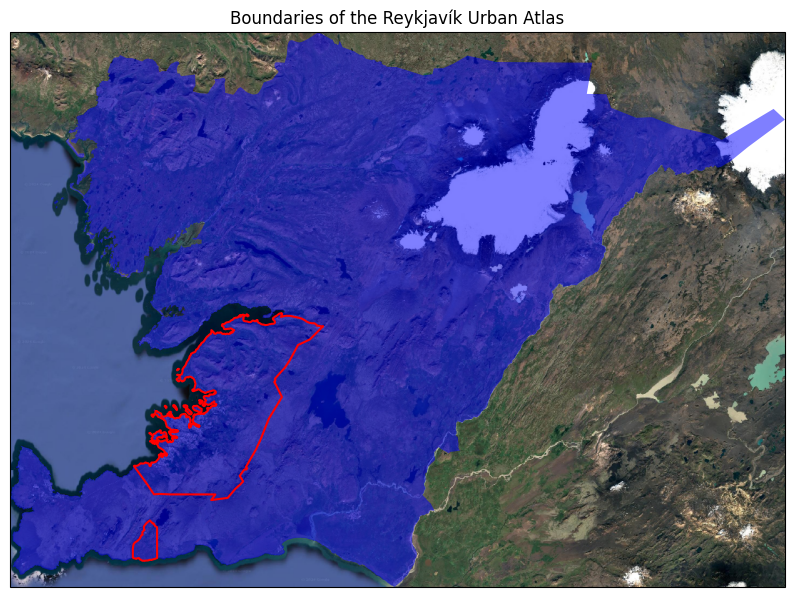

In [12]:
# if you did not run the cell in 2.3 Importing the necessary libraries, please uncomment the following two lines by deleting the # at the beginning of the lines
#import matplotlib.pyplot as plt
#import cartopy.crs as ccrs
#from cartopy.io.img_tiles import GoogleTiles


# Create a figure and define its size, create an axis using the PlateCarree projection (latitude/longitude)
f = plt.figure(figsize=(10, 10))
ax = plt.axes(projection=ccrs.PlateCarree())

# Extract the extent (geographical boundaries) from the 'bound' dataset to focus on the area of interest
extent = bound.geometry.bounds
ax.set_extent([extent.minx, extent.maxx, extent.miny, extent.maxy],crs=ccrs.PlateCarree())

# Add Google satellite imagery as the background, with zoom level 10
imagery = GoogleTiles(style='satellite')
ax.add_image(imagery, 10)

# Plot the 'bound' dataset (representing the boundary), with semi-transparent blue fill
bound.plot(ax=ax, color='b', alpha=0.5)

# Plot the boundary of the 'urban_core' dataset (representing the core of the urban area), in red
urban_core.boundary.plot(ax=ax, color='r')

# Add a title to the map and display the plot
ax.set_title('Boundaries of the Reykjavík Urban Atlas')
plt.show()

Now that we have an idea of the geographical extent of the data, we can start exploring the main dataset. Note that at this zoom level, we probably won't have a clear visiblity on the urban design of Reykjavik. Let's now define an area of interest around the more urbanized center of the city :



In [40]:
# define smaller area of interest
lon_min, lon_max, lat_min, lat_max = (-21.95, -21.80, 64.10, 64.15)

In [41]:
# exploring the dataset
print(len(gdf))
gdf.head() # head() displays only the first 5 rows

12747


country   fua_name fua_code code_2018  \
0      IS  Reykjavík  IS001L1     11220   
1      IS  Reykjavík  IS001L1     11220   
2      IS  Reykjavík  IS001L1     11220   
3      IS  Reykjavík  IS001L1     12100   
4      IS  Reykjavík  IS001L1     11300   

                                          class_2018 prod_date    identifier  \
0  Discontinuous medium density urban fabric (S.L...   2020-02   822-IS001L1   
1  Discontinuous medium density urban fabric (S.L...   2020-02   977-IS001L1   
2  Discontinuous medium density urban fabric (S.L...   2020-02  1354-IS001L1   
3  Industrial, commercial, public, military and p...   2020-02  5227-IS001L1   
4                                Isolated structures   2020-02  3998-IS001L1   

     perimeter           area comment  Pop2018  \
0  5092.226430  107890.968164    None      497   
1  6194.522687  154323.855707    None      540   
2   401.445677    8074.128205    None       40   
3   222.310796    3034.597075    None        0   
4   254.002088    3915.600824    None        0   

                                            geometry  
0  MULTIPOLYGON (((-21.93818 64.06986, -21.93821 ...  
1  MULTIPOLYGON (((-21.91276 64.09165, -21.91276 ...  
2  MULTIPOLYGON (((-22.5591 64.0003, -22.56159 63...  
3  MULTIPOLYGON (((-21.01054 63.95265, -21.01006 ...  
4  MULTIPOLYGON (((-21.9756 64.0776, -21.97462 64...

In the dataset, there are many polygons, each one of them having several characteristics : geometrical ones such as area or perimeter, but the most interesting in this training will be the *class_2012* class, which gives the type of area for each polygon.

We can select this particular column in the dataset with the following command :

In [42]:
gdf['class_2018']

0        Discontinuous medium density urban fabric (S.L...
1        Discontinuous medium density urban fabric (S.L...
2        Discontinuous medium density urban fabric (S.L...
3        Industrial, commercial, public, military and p...
4                                      Isolated structures
                               ...                        
12742    Herbaceous vegetation associations (natural gr...
12743    Herbaceous vegetation associations (natural gr...
12744    Herbaceous vegetation associations (natural gr...
12745    Herbaceous vegetation associations (natural gr...
12746    Herbaceous vegetation associations (natural gr...
Name: class_2018, Length: 12747, dtype: object

In [43]:
# printing all possible classes
np.unique(gdf['class_2018'])

array(['Airports', 'Arable land (annual crops)', 'Construction sites',
       'Continuous urban fabric (S.L. : > 80%)',
       'Discontinuous dense urban fabric (S.L. : 50% -  80%)',
       'Discontinuous low density urban fabric (S.L. : 10% - 30%)',
       'Discontinuous medium density urban fabric (S.L. : 30% - 50%)',
       'Discontinuous very low density urban fabric (S.L. : < 10%)',
       'Forests', 'Green urban areas',
       'Herbaceous vegetation associations (natural grassland, moors...)',
       'Industrial, commercial, public, military and private units',
       'Isolated structures', 'Land without current use',
       'Mineral extraction and dump sites',
       'Open spaces with little or no vegetation (beaches, dunes, bare rocks, glaciers)',
       'Other roads and associated land', 'Pastures', 'Port areas',
       'Sports and leisure facilities', 'Water', 'Wetlands'], dtype=object)

Above are all the possible classes found in the dataset. It is possible to subset the data based on a class value. For example let's select only the Urban Green Areas in Reykjavik :

In [44]:
# let's subset the dataset by selecting one class
gdf_green = gdf[gdf['class_2018']=='Green urban areas']

gdf_green.head()

country   fua_name fua_code code_2018         class_2018 prod_date  \
140      IS  Reykjavík  IS001L1     14100  Green urban areas   2020-02   
173      IS  Reykjavík  IS001L1     14100  Green urban areas   2020-02   
964      IS  Reykjavík  IS001L1     14100  Green urban areas   2020-02   
965      IS  Reykjavík  IS001L1     14100  Green urban areas   2020-02   
966      IS  Reykjavík  IS001L1     14100  Green urban areas   2020-02   

       identifier   perimeter          area comment  Pop2018  \
140  7113-IS001L1  239.279168   3317.566157    None        0   
173  7120-IS001L1  278.797598   4496.181810    None        0   
964  7091-IS001L1  894.494840  24327.805776    None        0   
965  7092-IS001L1  976.863643  21708.677204    None        0   
966  7095-IS001L1  386.240944   8797.134483    None        0   

                                              geometry  
140  MULTIPOLYGON (((-21.91199 64.13955, -21.91159 ...  
173  MULTIPOLYGON (((-21.90503 64.13156, -21.90487 ...  
964  MULTIPOLYGON (((-21.84146 64.10606, -21.84127 ...  
965  MULTIPOLYGON (((-21.84127 64.10673, -21.84126 ...  
966  MULTIPOLYGON (((-21.84311 64.09778, -21.84272 ...

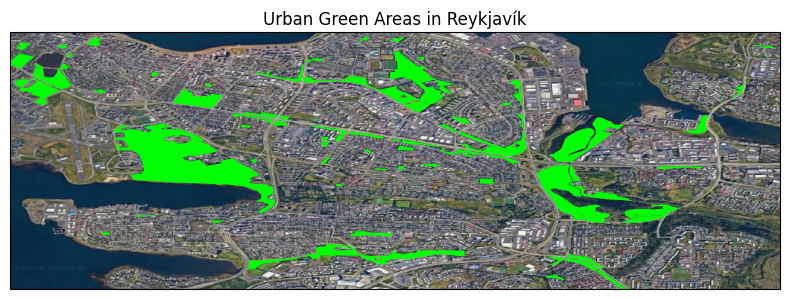

In [53]:
# This cell will plot the green urban areas (represented in lime color) in Reykjavík on top of a satellite image
# The satellite image is provided by Google Maps
# The extent of the map is defined by the bounding box of the green urban areas
# To run this cell, you need to have the 'gdf_green' GeoDataFrame defined in the previous cell and imported the necessary libraries: matplotlib, cartopy and geopandas

# Create figure and set the extent using lat/lon values but specify the extent CRS as PlateCarree (simple lat/lon CRS)
f = plt.figure(figsize=(8, 8))
ax = plt.axes(projection=ccrs.PlateCarree()) # specify the projection of the map
ax.set_extent([lon_min, lon_max, lat_min, lat_max],crs=ccrs.PlateCarree())  # zooming on area of interest

# Add google imagery as the background
imagery = GoogleTiles(style='satellite')
ax.add_image(imagery, 13)

# Plot the green areas in 'lime' color and set the title
gdf_green.plot(ax=ax, color='lime')
ax.set_title('Urban Green Areas in Reykjavík')

# Adjust layout to prevent clipping or excessive whitespace and show the final image
plt.tight_layout()
plt.show()

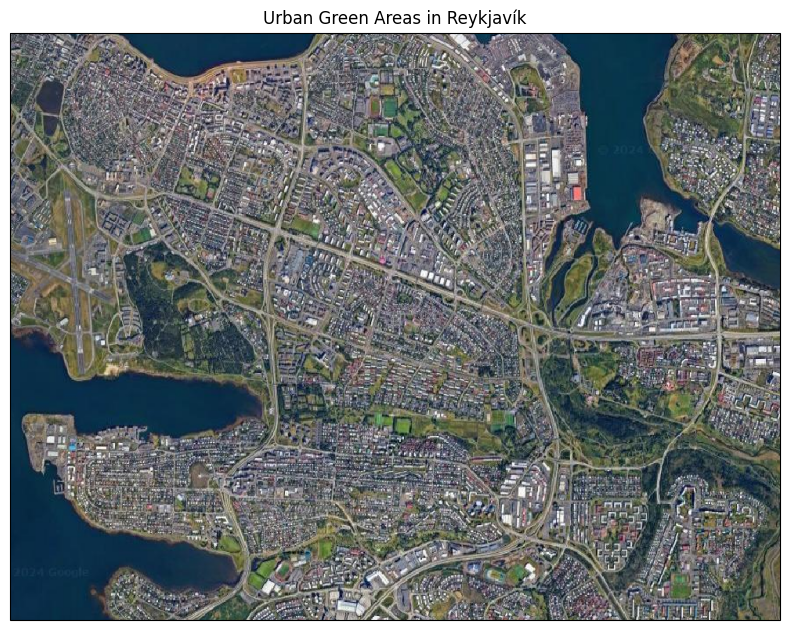

In [61]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import geopandas as gpd

# Assuming 'gdf_green' contains the Urban Atlas data in EPSG:3035
# Reproject the Urban Atlas data from EPSG:3035 to EPSG:3857 (Web Mercator)
gdf_green_mercator = gdf_green.to_crs(epsg=3857)

# Create figure and specify the Mercator projection
f = plt.figure(figsize=(8, 8))
ax = plt.axes(projection=ccrs.Mercator())

# Set the extent using lat/lon values but specify the extent CRS as PlateCarree (simple lat/lon CRS)
ax.set_extent([lon_min, lon_max, lat_min, lat_max], crs=ccrs.PlateCarree())

# Add satellite imagery (Google Tiles, which works well with Mercator projection)
imagery = GoogleTiles(style='satellite')
ax.add_image(imagery, 13)

# Plot the reprojected Urban Atlas green areas on the Mercator map
gdf_green_mercator.plot(ax=ax, color='lime')

# Set the title
ax.set_title('Urban Green Areas in Reykjavík')

# Adjust layout to prevent clipping or excessive whitespace
plt.tight_layout()

plt.show()






It is also possible to subset the dataset based on several class values. Let's select all the classes referring to the road network :

Text(0.5, 1.0, 'Road network in Reykjavík')

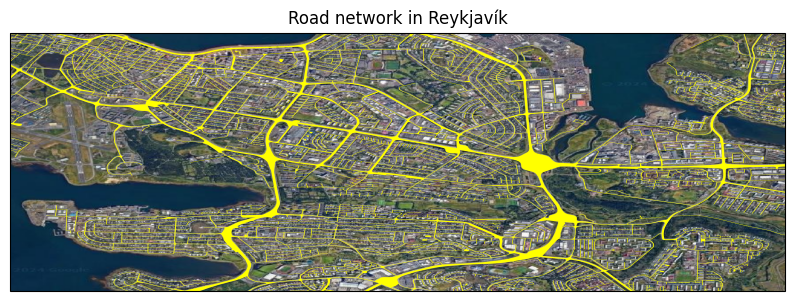

In [26]:
# let's plot the road network for instance !

gdf_st = gdf[gdf.class_2018.isin(['Fast transit roads and associated land',
                   'Other roads and associated land'])]

f = plt.figure(figsize=(10, 10))                                                   # create a figure and define its size
ax = plt.axes(projection=ccrs.PlateCarree())

ax.set_extent([lon_min, lon_max, lat_min, lat_max],crs=ccrs.PlateCarree())

imagery = GoogleTiles(style='satellite')
ax.add_image(imagery, 13)

gdf_st.plot(ax=ax, color='yellow')

ax.set_title('Road network in Reykjavík')

## 4.2. Intermediate Manipulations

[Go back to the "Table of contents"](#Table-of-contents)



### 4.2.1. Geospatial subsetting

[Go back to the "Table of contents"](#Table-of-contents)


We can subset the dataset by selecting only the polygons contained within a certain area. For instance let's select only the polygons located within the "urban core" boundaries :

In [18]:
# selecting only urban core areas :
# the polygons WITHIN the urban core boundaries will be selected
# it takes some time...

gdf_c = gdf[gdf.within(urban_core.geometry.unary_union)]

In [19]:
print(len(gdf_c))
gdf_c.head()

3028


country   fua_name fua_code code_2018  \
0       IS  Reykjavík  IS001L1     11220   
1       IS  Reykjavík  IS001L1     11220   
4       IS  Reykjavík  IS001L1     11300   
9       IS  Reykjavík  IS001L1     11210   
10      IS  Reykjavík  IS001L1     11220   

                                           class_2018 prod_date    identifier  \
0   Discontinuous medium density urban fabric (S.L...   2020-02   822-IS001L1   
1   Discontinuous medium density urban fabric (S.L...   2020-02   977-IS001L1   
4                                 Isolated structures   2020-02  3998-IS001L1   
9   Discontinuous dense urban fabric (S.L. : 50% -...   2020-02   279-IS001L1   
10  Discontinuous medium density urban fabric (S.L...   2020-02   946-IS001L1   

      perimeter           area comment  Pop2018  \
0   5092.226430  107890.968164    None      497   
1   6194.522687  154323.855707    None      540   
4    254.002088    3915.600824    None        0   
9   4816.030998  108858.389327    None      786   
10  3946.717842  104837.386149    None     1124   

                                             geometry  
0   MULTIPOLYGON (((-21.93818 64.06986, -21.93821 ...  
1   MULTIPOLYGON (((-21.91276 64.09165, -21.91276 ...  
4   MULTIPOLYGON (((-21.9756 64.0776, -21.97462 64...  
9   MULTIPOLYGON (((-21.98021 64.05515, -21.98113 ...  
10  MULTIPOLYGON (((-21.81732 64.10864, -21.81551 ...

### 4.2.2. Drawing Chloropleth maps

[Go back to the "Table of contents"](#Table-of-contents)

We have a lot less values ! We will visualize this dataset in the next section.



With Geodatasets, it is possible to plot maps, where each polygon has a color determined by the value of an associated variable. For example, in the Urban Atlas dataset, a column gives an estimation of the population for some polygons. Let's plot the urban areas and highlight their population on a single map !

In [20]:
# the next analyses will be made over urban areas

gdf_c_urb = gdf_c[gdf_c.class_2018.isin(['Continuous urban fabric (S.L. : > 80%)',
                   'Discontinuous dense urban fabric (S.L. : 50% -  80%)',
                   'Discontinuous low density urban fabric (S.L. : 10% - 30%)',
                   'Discontinuous medium density urban fabric (S.L. : 30% - 50%)',
                   'Discontinuous very low density urban fabric (S.L. : < 10%)'])]

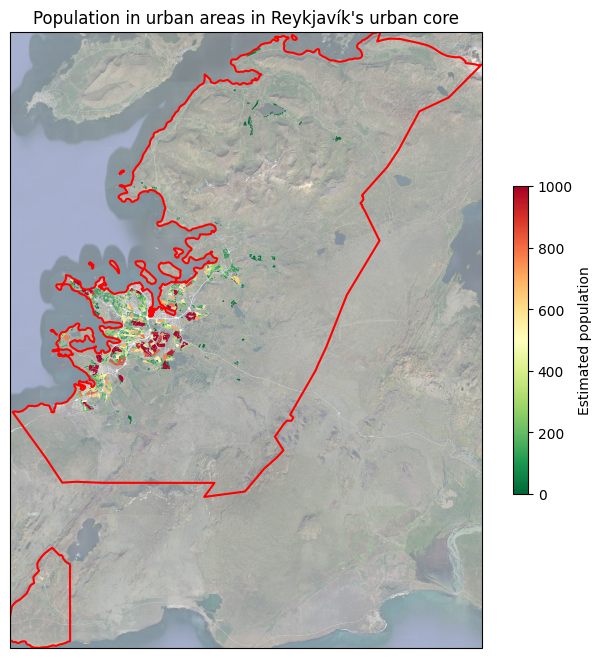

In [29]:
f = plt.figure(figsize=(8, 8))                                                   # create a figure and define its size
ax = plt.axes(projection=ccrs.PlateCarree()) 

extent = urban_core.geometry.bounds
ax.set_extent([extent.minx, extent.maxx, extent.miny, extent.maxy], crs=ccrs.PlateCarree())

imagery = GoogleTiles(style='satellite')
ax.add_image(imagery, 12, alpha = 0.5)

urban_core.boundary.plot(ax=ax, color='r')
gdf_st.plot(ax=ax, color='white')

vmin, vmax = (0,1000)
gdf_c_urb.plot(ax=ax, column='Pop2018', vmin=vmin, vmax=vmax, cmap='RdYlGn_r')

plt.colorbar(ScalarMappable(Normalize(vmin, vmax), cmap='RdYlGn_r'), ax=ax, shrink=0.5, label='Estimated population')

ax.set_title("Population in urban areas in Reykjavík's urban core");

# 5. Analysing the land use of Reykjavík and its neighborhood

[Go back to the "Table of contents"](#Table-of-contents)


For each polygon, its area is provided. We can analyse what proportion each class represents in surface in the dataset. We will use the *groupby()* function to find the total area for each class.

In [ ]:
df_class_area = gdf[['code_2018','class_2018', 'area']].groupby(by=['class_2018', 'code_2018'], as_index=False).sum()
df_class_area

There are more than 20 different classes. To make things a little simpler, we propose to group similar classes together. Each class has a code (code_2012). The first number of the code gives the category the class belongs to (see [documentation](https://land.copernicus.eu/en/products/urban-atlas)):
*  1: Artificial surfaces
*  2: Agricultural areas
*  3: Natural or Semi-Natural areas
*  4: Wetlands
*  5: Water

We will now associated each polygon with its main category.

In [ ]:
class_d = {1:'Artificial surfaces',
           2:'Agricultural areas',
           3:'Natural/Semi-natural areas',
           4:'Wetlands',
           5:'Water'
        }

df_class_area['parent_class'] = [class_d[int(i)] for i in df_class_area['code_2018'].astype(str).str[0].tolist()]
df_class_area.head()

In [ ]:
gdf_2 = gdf.copy()
gdf_2['parent_class'] = [class_d[int(i)] for i in gdf_2['code_2018'].astype(str).str[0].tolist()]
gdf_2.head()

In [ ]:
df_cla_reduced = df_class_area[['parent_class', 'area']].groupby(by=['parent_class'], as_index=True).sum()

from matplotlib.colors import ListedColormap
cmap = ['gold', 'red', 'limegreen','royalblue', 'springgreen']

fig = plt.figure(figsize=(16,8))

# plotting pie chart
ax1 = plt.subplot(121)
df_cla_reduced.plot.pie(ax=ax1, y='area', cmap=ListedColormap(cmap), labels=None, autopct='%1.1f%%')



# plotting simplified map
ax2 = plt.subplot(122, projection=ccrs.PlateCarree()) 

extent = bound.geometry.bounds
ax2.set_extent([extent.minx, extent.maxx, extent.miny, extent.maxy], crs=ccrs.PlateCarree())

imagery = GoogleTiles(style='satellite')
ax2.add_image(imagery, 12, alpha = 0.5)

for i, cl in enumerate(sorted(class_d.values())):
    gdf_2[gdf_2.parent_class == cl].plot(ax=ax2, color=cmap[i])
    
plt.suptitle('Analysis of the composition of the Reykjavík Urban Atlas dataset');

# 6. Case study : Proximity of the urban areas to green spaces

[Go back to the "Table of contents"](#Table-of-contents)


In this section, we will compute the distance of each urban area to the closest urban green spaces. The goal is to identify areas that may be depleted with city parks for instance.

Geopandas provides a *distance* function that allows to compute the distance between two objects. The distance is however computed based on the coordinate system the Geodataset is using. In our case we are using a lon/lat coordinate system (WGS84 : EPSG:4326). We need to shift to a coordinate system that provides location information using the metric system, so the distance we compute is in meters. Reykjavik is located in the UTM zone N°31T, we can use the associated projection system EPSG:32631, which is in meters.

In [23]:
# distance of each urban area to the closest green area ?
# warning, executing this cell takes some time


d_closest_green_area = []
green_spaces = gdf_green.to_crs(epsg=32631).geometry.unary_union
gdf_c_urb_tmp = gdf_c_urb.to_crs(epsg=32631)

for i in range(len(gdf_c_urb)):
    d_closest_green_area.append(gdf_c_urb_tmp.iloc[i].geometry.distance(green_spaces))

gdf_c_urb['d_closest_green_area'] = d_closest_green_area

Let's now see what areas are the farthest from the green spaces of Reykjavik. Of course this analysis doesn't take into account the streets or the public transportation network.

In [ ]:
# plotting
lon_min, lon_max, lat_min, lat_max = (-21.95, -21.80, 64.10, 64.15)  # define smaller area of interest



f = plt.figure(figsize=(8, 8))                                                   # create a figure and define its size
ax = plt.axes(projection=ccrs.PlateCarree()) 


ax.set_extent([lon_min, lon_max, lat_min, lat_max],crs=ccrs.PlateCarree())
imagery = GoogleTiles(style='satellite')
ax.add_image(imagery, 12, alpha=0.5)
vmin, vmax = (0, 1500)

gdf_st.plot(ax=ax, color='white')
gdf_green.plot(ax=ax, color='lime')
gdf_c_urb.plot(ax=ax, column='d_closest_green_area', vmin=vmin, vmax=vmax, cmap='magma_r')

plt.colorbar(ScalarMappable(Normalize(vmin, vmax), cmap='magma_r'), ax=ax, shrink=0.5, label='Distance to closest urban green area (m)')
ax.set_title("Proximity of urban areas to green spaces\n in Reykjavík");

We can deepen the analysis by combining the distance to the closest green space to the population estimates provided in the urban Atlas dataset. Therefore we may be able to identify densely populated areas that are also far from any green area.

In [ ]:
# computing the population density in ppl/ 1000m²

gdf_c_urb['pop_density'] = gdf_c_urb['Pop2018'] / gdf_c_urb['area'] * 10000

# plotting
lon_min, lon_max, lat_min, lat_max = (-21.95, -21.80, 64.10, 64.15)  # define smaller area of interest



f = plt.figure(figsize=(8, 8))                                                   # create a figure and define its size
ax = plt.axes(projection=ccrs.PlateCarree()) 


ax.set_extent([lon_min, lon_max, lat_min, lat_max],crs=ccrs.PlateCarree())
imagery = GoogleTiles(style='satellite')
ax.add_image(imagery, 12, alpha=0.5)
vmin, vmax = (0, 200)

gdf_c_urb.plot(ax=ax, column='pop_density', vmin=vmin, vmax=vmax, cmap='Reds')

plt.colorbar(ScalarMappable(Normalize(vmin, vmax), cmap='Reds'), ax=ax, shrink=0.5, label='Pop density (pers/10.000 m²)')
ax.set_title("Proximity of urban areas to green spaces\n in Reykjavík");

In [ ]:
# parallel with distance

fig, ax = plt.subplots(figsize=(8,8))
ax.scatter(gdf_c_urb.pop_density,
            gdf_c_urb.d_closest_green_area,
            s=gdf_c_urb['area']/200, c='b', alpha=0.1)

ax.grid(True)
ax.set_xlabel('Population Density (ppl/ 10.000 m²)')
ax.set_ylabel('Distance to closest urban Green Area (m)')
ax.set_title("Distance to closest green area VS population Density in Reykjavík\n marker size is based on polygon area")
ax.vlines([75], ymin=500, ymax=3000, color='r')
ax.hlines([500], xmin=75, xmax=300, color='r');

Beyond the red lines are located the areas that are more densely populated (more than 200 ppl/10.000m²) that are also relatively far from any green space (more than 500m away). Let's plot those critical areas on a map.

In [ ]:
gdf_c_urb_crit = gdf_c_urb[(gdf_c_urb.d_closest_green_area >= 500) & (gdf_c_urb.pop_density >= 75)]
gdf_c_urb_crit

In [ ]:
f = plt.figure(figsize=(8, 8))                                                   # create a figure and define its size
ax = plt.axes(projection=ccrs.PlateCarree()) 


ax.set_extent([lon_min, lon_max, lat_min, lat_max],crs=ccrs.PlateCarree())
imagery = GoogleTiles(style='satellite')
ax.add_image(imagery, 12)
vmin, vmax = (0, 200)

gdf_c_urb.plot(ax=ax, color='k', alpha=0.3)
gdf_c_urb_crit.plot(ax=ax, color='r', label='critical districts')
gdf_green.plot(ax=ax, color='lime', label='critical urban areas')

ax.set_title('Densely populated districts \n located far from urban green spaces')

red_patch = mpatches.Patch(color='red', label='critical districts')
green_patch = mpatches.Patch(color='lime', label='urban green spaces')

ax.legend(handles=[red_patch, green_patch])


We can clearly distinguish a few clusters that have identified as critical! Of course several other factors should be analysed to precisely assess the accessiblity to green areas for those districts. The walking distance should be computed taking into account the shape of the street network, the size of the parks themself should also be accounted for... this show the Urban Atlas can be a very useful tool for urban planning.

# 7. Conclusion

[Go back to the "Table of contents"](#Table-of-contents)

In this notebook we have studied the urban design of the city of Reykjavik. We have learned to manipulate geodatasets, and have computed the proximity of the urban areas to the green spaces of the city.

# 8. Exercises

[Go back to the "Table of contents"](#Table-of-contents)

Here is a set of exercises we propose for you to go further into the analysis. There are 2 levels depending on how much Python code you need to write to answer the questions.

**Beginners** :

- In [Section 4.1](#6.-Correlation-with-sea-Level-evolution), we plotted the green spaces and the road network of Reykjavik. try plotting other classes on the map!

- In [Section 5](#6.-Correlation-with-sea-Level-evolution) we have plotted the composition of the entire Urban Atlas dataset. Try doing the same analysis using only the "Urban core" subset.


**Intermediate** :

- In [Section 6](#6.-Correlation-with-sea-Level-evolution), we studied the proximity of urban areas to green spaces. Can you analyse the proximity of the urban areas to the sports and leisure facilities ?

- We performed our analysis on Reykjavik. Try doing a similar analysis over one the several hundred cities covered by the Urban Atlas !


<div class="alert alert-block alert-success">
    <b>Congratulations !!</b><br>
  
--- 

##### **And thank you for your attention! :)** 
    
    
We hope you enjoyed this Jupyter Notebook training.

You now have plenty of tools to study urban designs using the COPERNICUS Urban Atlas. Feel free to re-use and adapt all the Python scripts of this notebook to your needs! 



# Additional Information
---

#### Compatible Data Science Toolkits

In [5]:
import importlib_metadata

# Get the version of the 'hda' package
hda_version = importlib_metadata.version("hda")
print(hda_version)


2.18


In [3]:
import xarray; print(xarray.__version__)

2024.9.0


#### Last Modified and Tested

In [4]:
from datetime import date; print(date.today())

2024-10-02


<img src='https://github.com/wekeo/ai4EM_MOOC/raw/04147f290cfdcce341f819eab7ad037b95f25600/img/ai4eo_logos.jpg' alt='Logo EU Copernicus WEkEO' align='center' width='100%'></img>